In [3]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
print("Device name:", tf.test.is_gpu_available())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

if gpus:
    gpu0 = gpus[0]                                        #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpu0],"GPU")


Device name: True
Num GPUs Available:  1


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers,models

import pathlib


In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(fname    = 'flower_photos', # 下载到本地后的文件名称
                                   origin   = dataset_url,     # 数据集(Dataset)的URL路径；
                                   untar    = True,            # 是否解压文件
                                   cache_dir= 'D:/jupyter notebook/DL-100-days')

data_dir = pathlib.Path(data_dir)
data_dir


WindowsPath('/tmp/.keras/datasets/flower_photos')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))

print("图片总数为：",image_count)


图片总数为： 3670


In [5]:
batch_size = 32
img_height = 180
img_width = 180


In [5]:
"""
关于image_dataset_from_directory()的详细介绍可以参考文章：https://mtyjkh.blog.csdn.net/article/details/117018789
"""
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
"""
关于image_dataset_from_directory()的详细介绍可以参考文章：https://mtyjkh.blog.csdn.net/article/details/117018789
"""
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


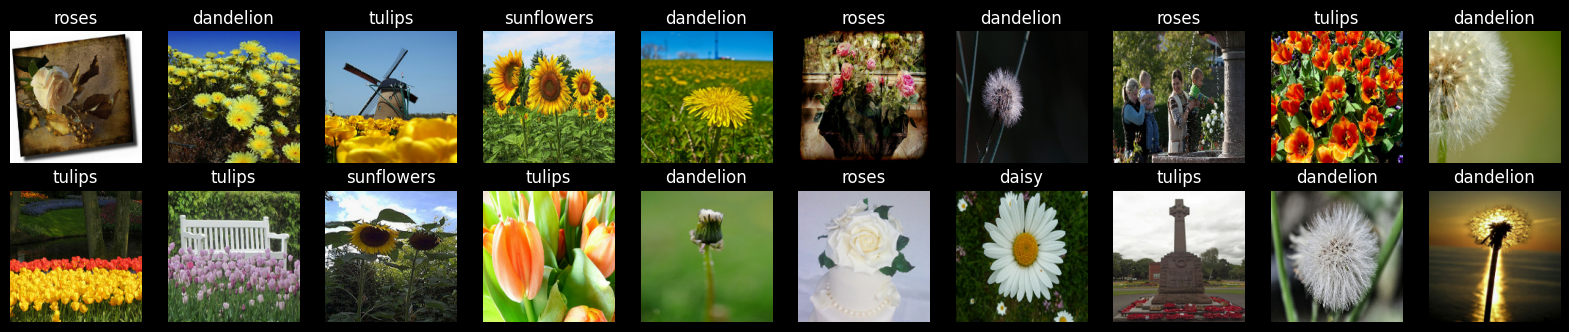

In [8]:
plt.figure(figsize=(20, 10))

for images, labels in train_ds.take(1):
    for i in range(20):
        ax = plt.subplot(5, 10, i + 1)

        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        
        plt.axis("off")


In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break


(32, 180, 180, 3)
(32,)


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [11]:
num_classes = 5

"""
关于卷积核的计算不懂的可以参考文章：https://blog.csdn.net/qq_38251616/article/details/114278995
"""

model = models.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), # 卷积层1，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   # 池化层1，2*2采样
    layers.Conv2D(32, (3, 3), activation='relu'),  # 卷积层2，卷积核3*3
    layers.MaxPooling2D((2, 2)),                   # 池化层2，2*2采样
    layers.Conv2D(64, (3, 3), activation='relu'),  # 卷积层3，卷积核3*3
    
    layers.Flatten(),                       # Flatten层，连接卷积层与全连接层
    layers.Dense(128, activation='relu'),   # 全连接层，特征进一步提取
    layers.Dense(num_classes)               # 输出层，输出预期结果
])

model.summary()  # 打印网络结构


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        1

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [13]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)


Epoch 1/10
92/92 [==============================] - 13s 94ms/step - loss: 1.3696 - accuracy: 0.4489 - val_loss: 1.1272 - val_accuracy: 0.5177
Epoch 2/10
92/92 [==============================] - 3s 28ms/step - loss: 0.9976 - accuracy: 0.6165 - val_loss: 0.9291 - val_accuracy: 0.6322
Epoch 3/10
92/92 [==============================] - 3s 34ms/step - loss: 0.8135 - accuracy: 0.6887 - val_loss: 0.9428 - val_accuracy: 0.6308
Epoch 4/10
92/92 [==============================] - 2s 26ms/step - loss: 0.5941 - accuracy: 0.7701 - val_loss: 0.9199 - val_accuracy: 0.6649
Epoch 5/10
92/92 [==============================] - 2s 26ms/step - loss: 0.3743 - accuracy: 0.8702 - val_loss: 1.1255 - val_accuracy: 0.6512
Epoch 6/10
92/92 [==============================] - 4s 40ms/step - loss: 0.1962 - accuracy: 0.9373 - val_loss: 1.3717 - val_accuracy: 0.6417
Epoch 7/10
92/92 [==============================] - 3s 34ms/step - loss: 0.1091 - accuracy: 0.9690 - val_loss: 1.5393 - val_accuracy: 0.6621
Epoch 8/10
9

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(val_ds, verbose=2)
